In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()
print('Shape of X_train:',X_train.shape)
print('Shape of Y_train:',Y_train.shape)
print('Samples of X_train:',X_train.shape[0])
print('Samples of Y_train:',Y_train.shape[0])

Shape of X_train: (50000, 32, 32, 3)
Shape of Y_train: (50000, 1)
Samples of X_train: 50000
Samples of Y_train: 50000


D:\Anaconda\envs\cvpr\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\envs\cvpr\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


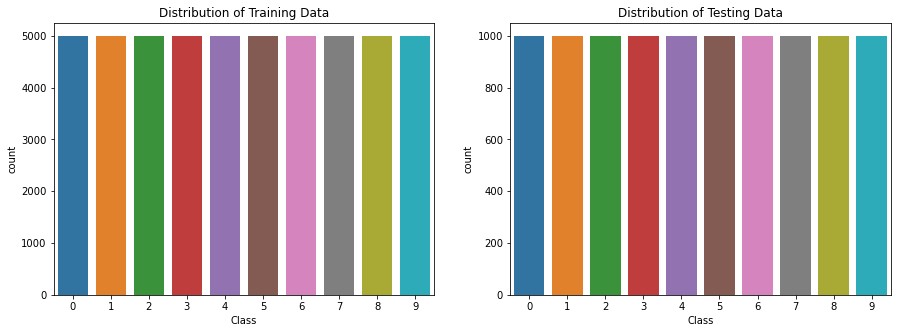

In [3]:
fig,axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(Y_train.ravel(),ax = axs[0])
axs[0].set_title('Distribution of Training Data')
axs[0].set_xlabel('Class')
sns.countplot(Y_test.ravel(),ax = axs[1])
axs[1].set_title('Distribution of Testing Data')
axs[1].set_xlabel('Class')
plt.show()

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
num_classes = 10
Y_train = keras.utils.to_categorical(Y_train,num_classes)
Y_test = keras.utils.to_categorical(Y_test,num_classes)

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [6]:
opt = keras.optimizers.RMSprop(learning_rate = 0.0001,decay = 1e-6)
model.compile(loss = 'categorical_crossentropy',optimizer = opt,metrics = ['accuracy'])

In [7]:
batch_size = 32
epochs = 5
plenty_data_augmentation = True

In [8]:
history = None
if not plenty_data_augmentation:
    print('Simple Data Augmentation')
    datagen = ImageDataGenerator(rotation_range = 0,width_shift_range = 0.1,height_shift_range = 0.1,data_format = None,validation_split = 0.0)
    datagen.fit(X_train)
    history = model.fit(datagen.flow(X_train,Y_train,batch_size = batch_size),epochs = epochs,validation_data = (X_test,Y_test),workers = 4)
else:
    print('Heavy Data Augmentation')
    datagen = ImageDataGenerator(featurewise_center = False,samplewise_center = False,featurewise_std_normalization = False,samplewise_std_normalization = False,zca_whitening = False,zca_epsilon = 1e-6,rotation_range = 0,width_shift_range = 0.1,height_shift_range = 0.1,shear_range = 0,zoom_range = 0,channel_shift_range = 0,fill_mode = 'nearest',cval = 0,horizontal_flip = True,vertical_flip = False,rescale = None,preprocessing_function = None,data_format = None,validation_split = 0.0)
    datagen.fit(X_train)
    history = model.fit(datagen.flow(X_train,Y_train,batch_size = batch_size),epochs = epochs,validation_data = (X_test,Y_test),workers = 4)

Heavy Data Augmentation
Epoch 1/5
1563/1563 [==============================] - 207s 131ms/step - loss: 2.0101 - accuracy: 0.2512 - val_loss: 1.5856 - val_accuracy: 0.4276
Epoch 2/5
1563/1563 [==============================] - 207s 133ms/step - loss: 1.5980 - accuracy: 0.4105 - val_loss: 1.4221 - val_accuracy: 0.4881
Epoch 3/5
1563/1563 [==============================] - 221s 141ms/step - loss: 1.4740 - accuracy: 0.4646 - val_loss: 1.2972 - val_accuracy: 0.5356
Epoch 4/5
1563/1563 [==============================] - 201s 129ms/step - loss: 1.3858 - accuracy: 0.4967 - val_loss: 1.2544 - val_accuracy: 0.5541
Epoch 5/5
1563/1563 [==============================] - 205s 131ms/step - loss: 1.3146 - accuracy: 0.5319 - val_loss: 1.2124 - val_accuracy: 0.5712


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


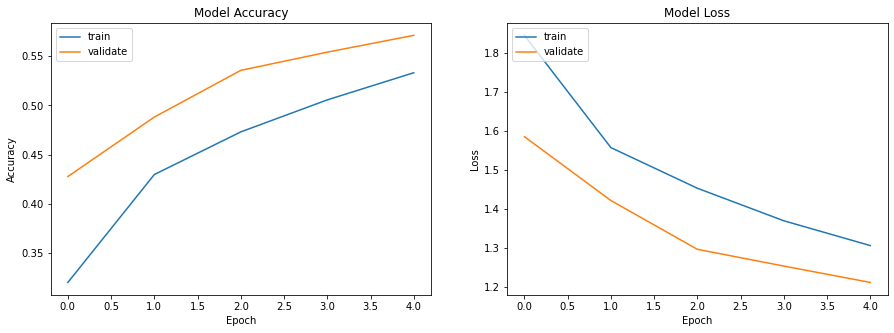

In [9]:
def plotmodelhistory(history):
    fig,axs = plt.subplots(1,2,figsize = (15,5))
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train','validate'],loc = 'upper left')
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train','validate'],loc = 'upper left')
    plt.show()
print(history.history.keys())
plotmodelhistory(history)

In [10]:
t = model.evaluate(X_test,Y_test,verbose = 1)
print('Test Loss:',t[0])
print('Test Accuracy:',t[1])
pred = model.predict(X_test)

313/313 [==============================] - 7s 23ms/step - loss: 1.2124 - accuracy: 0.5712
Test Loss: 1.2123827934265137
Test Accuracy: 0.5712000131607056
